 预测2012年每天的单车共享数量y,数据来源：Capital Bikeshare 

In [1]:
#导入工具包
import numpy as np  # 矩阵操作
import pandas as pd # SQL数据处理

from sklearn.metrics import r2_score  #评价回归预测模型的性能

import matplotlib.pyplot as plt   #画图
import seaborn as sns

# 图形出现在Notebook里而不是新窗口
%matplotlib inline

In [2]:
#读取数据
data = pd.read_csv('C:/Users/Lzg/Desktop/day.csv')

#通过观察前5行，了解数据每列（特征）的概况
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
#丢弃不必要的数据：instant、dteday
data = data.drop(['instant','dteday','casual','registered'], axis=1)


In [4]:
#查看样本数和特征维数
data.shape

(731, 12)

In [5]:
## 各属性的统计特性
data.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,8714.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 12 columns):
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
cnt           731 non-null int64
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [7]:
#查看是否有缺失数据
data.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

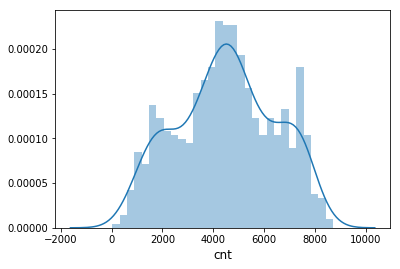

In [8]:
# 目标y（日单车共享数量）的直方图／分布
fig = plt.figure()
sns.distplot(data.cnt.values, bins=30, kde=True)
plt.xlabel('cnt', fontsize=12)
plt.show()

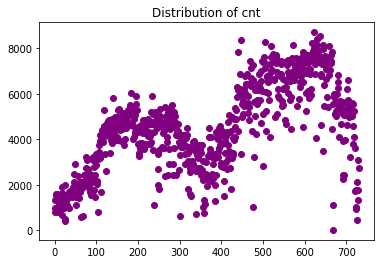

In [9]:
# 标y（日单车共享数量）散点图
plt.scatter(range(data.shape[0]), data["cnt"].values,color='purple')
plt.title('Distribution of cnt');

#输入属性的直方图

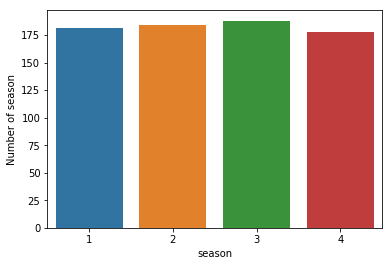

In [10]:
sns.countplot(data.season);
plt.xlabel('season');
plt.ylabel('Number of season');

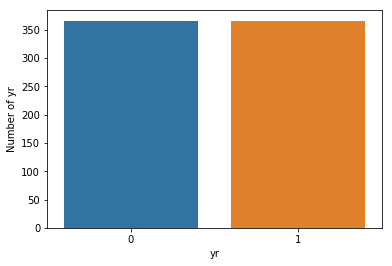

In [11]:
sns.countplot(data.yr);
plt.xlabel('yr');
plt.ylabel('Number of yr');

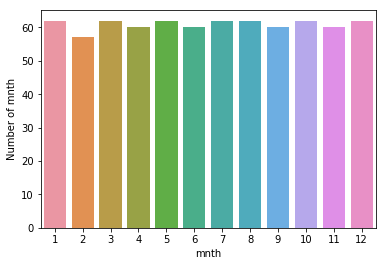

In [12]:
sns.countplot(data.mnth);
plt.xlabel('mnth');
plt.ylabel('Number of mnth');

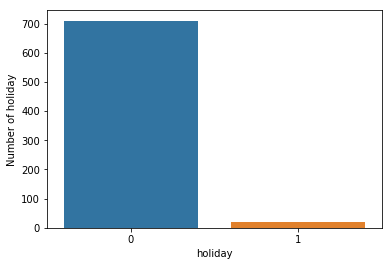

In [13]:
sns.countplot(data.holiday);
plt.xlabel('holiday');
plt.ylabel('Number of holiday');

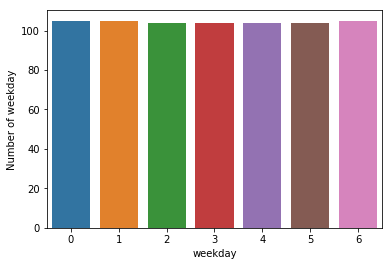

In [14]:
sns.countplot(data.weekday);
plt.xlabel('weekday');
plt.ylabel('Number of weekday');

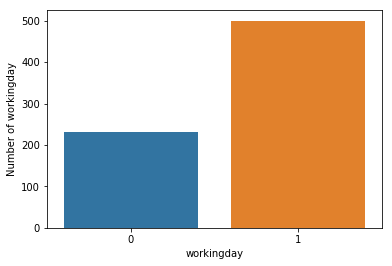

In [15]:
sns.countplot(data.workingday);
plt.xlabel('workingday');
plt.ylabel('Number of workingday');

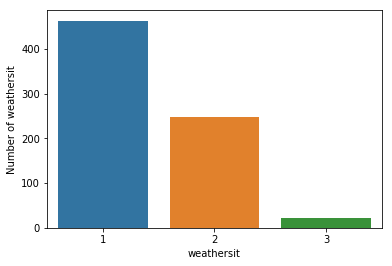

In [16]:
sns.countplot(data.weathersit);
plt.xlabel('weathersit');
plt.ylabel('Number of weathersit');

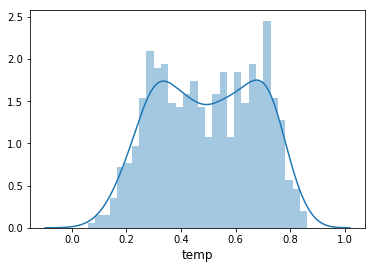

In [17]:
fig = plt.figure()
sns.distplot(data.temp.values, bins=30, kde=True)
plt.xlabel('temp', fontsize=12)
plt.show()

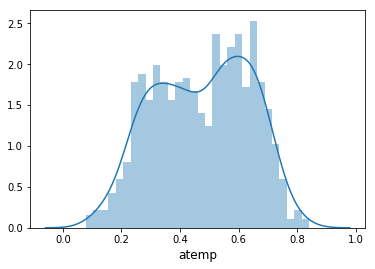

In [18]:
fig = plt.figure()
sns.distplot(data.atemp, bins=30, kde=True)
plt.xlabel('atemp', fontsize=12)
plt.show()

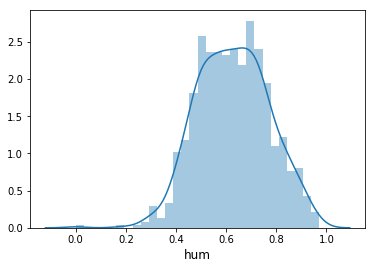

In [19]:
fig = plt.figure()
sns.distplot(data.hum.values, bins=30, kde=True)
plt.xlabel('hum', fontsize=12)
plt.show()

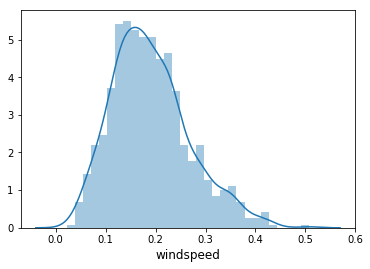

In [20]:
fig = plt.figure()
sns.distplot(data.windspeed.values, bins=30, kde=True)
plt.xlabel('windspeed', fontsize=12)
plt.show()

In [21]:
#两两特性的相关性
#get the names of all the columns
cols=data.columns 

# Calculates pearson co-efficient for all combinations，通常认为相关系数大于0.5的为强相关
data_corr = data.corr().abs()

In [22]:
data_corr.shape

(12, 12)

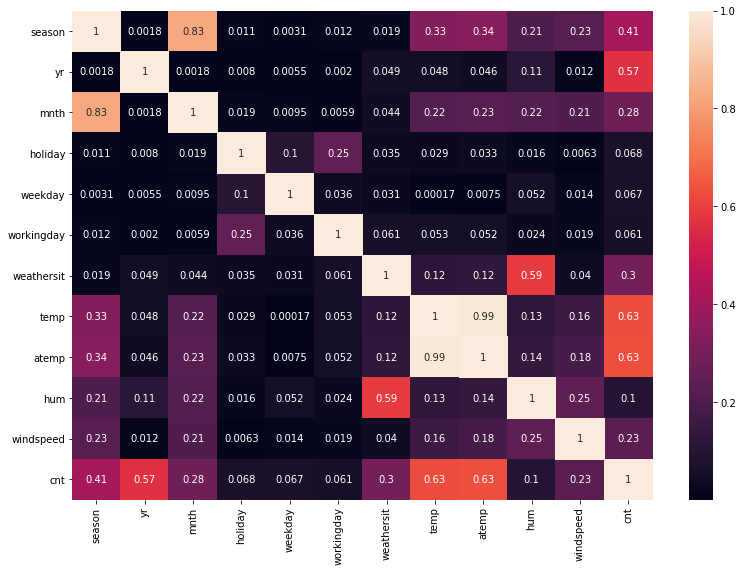

In [23]:
plt.subplots(figsize=(13, 9))
sns.heatmap(data_corr,annot=True)

# Mask unimportant features
sns.heatmap(data_corr, mask=data_corr < 1, cbar=False)

plt.savefig('bike_coor.png' )
plt.show()

In [24]:
#Set the threshold to select only highly correlated attributes
threshold = 0.5
# List of pairs along with correlation above threshold
corr_list = []
#size = data.shape[1]
size = data_corr.shape[0]

#Search for the highly correlated pairs
for i in range(0, size): #for 'size' features
    for j in range(i+1,size): #avoid repetition
        if (data_corr.iloc[i,j] >= threshold and data_corr.iloc[i,j] < 1) or (data_corr.iloc[i,j] < 0 and data_corr.iloc[i,j] <= -threshold):
            corr_list.append([data_corr.iloc[i,j],i,j]) #store correlation and columns index

#Sort to show higher ones first            
s_corr_list = sorted(corr_list,key=lambda x: -abs(x[0]))

#Print correlations and column names
for v,i,j in s_corr_list:
    print ("%s and %s = %.2f" % (cols[i],cols[j],v))

temp and atemp = 0.99
season and mnth = 0.83
atemp and cnt = 0.63
temp and cnt = 0.63
weathersit and hum = 0.59
yr and cnt = 0.57


可以看出与cnt强相关(>0.5)的是yr、temp、atemp
特征temp、atemp强相关（0.99）且与目标cnt强相关，存在冗余数据
weathersit（天气）和hum（湿度）相关（0.59）
season和mnth（月份）强相关（0.83），数据冗余
以上数据需要降维

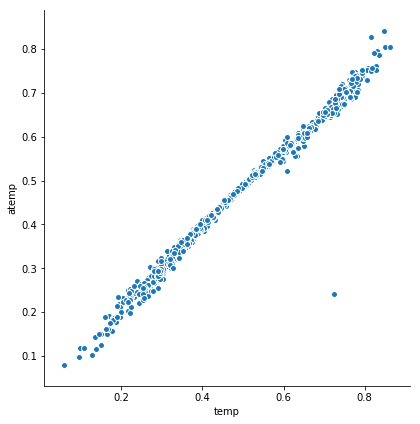

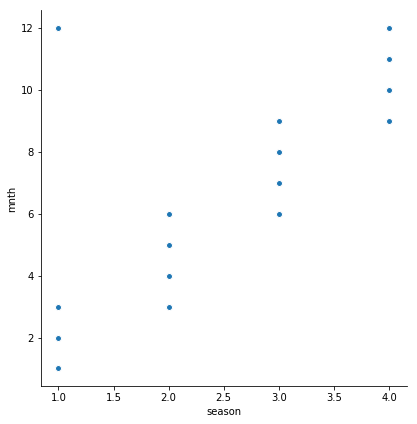

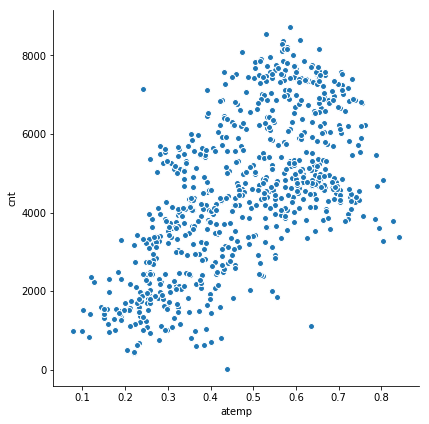

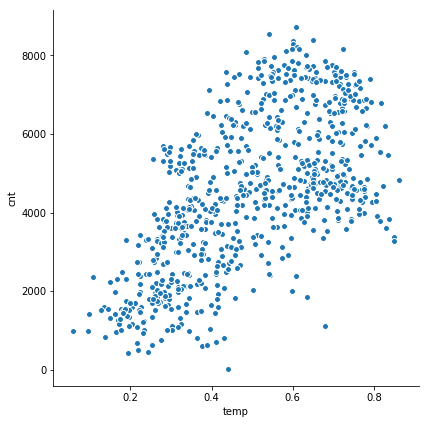

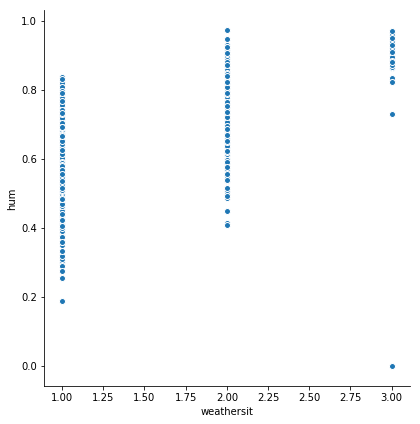

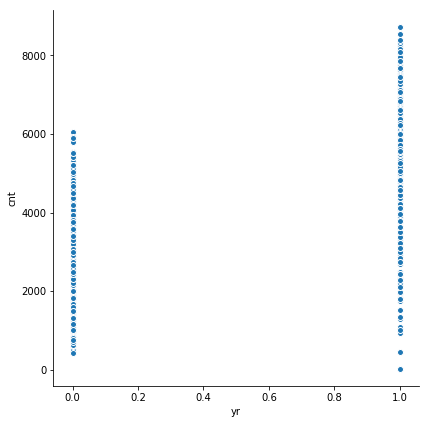

In [25]:
# Scatter plot of only the highly correlated pairs
for v,i,j in s_corr_list:
    sns.pairplot(data, size=6, x_vars=cols[i],y_vars=cols[j] )
    plt.show()

In [26]:
#先通过2011和2012将数据分为训练数据和测试数据
data_train=data[data.yr < 1]
data_test=data[data.yr==1]

In [27]:
data_test=data_test.drop('yr', axis = 1)
data_train=data_train.drop('yr', axis = 1)

In [28]:
data_train.shape

(365, 11)

In [29]:
data_test.shape

(366, 11)

In [30]:
data_test.head()

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
365,1,1,0,0,0,1,0.370000,0.375621,0.692500,0.192167,2294
366,1,1,1,1,0,1,0.273043,0.252304,0.381304,0.329665,1951
367,1,1,0,2,1,1,0.150000,0.126275,0.441250,0.365671,2236
368,1,1,0,3,1,2,0.107500,0.119337,0.414583,0.184700,2368
369,1,1,0,4,1,1,0.265833,0.278412,0.524167,0.129987,3272


In [31]:
# 从数据中分离x和y
y_train=data_train['cnt'].values
X_train = data_train.drop('cnt', axis = 1)
y_test=data_test['cnt'].values
X_test=data_test.drop('cnt', axis = 1)

#用于后续显示权重系数对应的特征
columns = X_train.columns

In [32]:
y_train.shape

(365,)

In [33]:
# x数据归一化
#feature=['season','mnth','weekday','weathersit']
#data=pd.get_dummies(data,prefix=tuple(feature),columns=feature)
from sklearn.preprocessing import MinMaxScaler

scaler_x = MinMaxScaler()
#scaler_y = MinMaxScaler()

X_train= scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)

# y数据标准化
from sklearn.preprocessing import StandardScaler

# 分别初始化对特征和目标值的标准化器
ss_y = StandardScaler()

#对y做标准化,y的取值范围过大
#对y标准化的好处是不同问题的w差异不太大，同时正则参数的范围也有限
y_train = ss_y.fit_transform(y_train.reshape(-1, 1))
y_test = ss_y.transform(y_test.reshape(-1, 1))


D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [34]:
#L2正则--岭回归

#class sklearn.linear_model.RidgeCV(alphas=(0.1, 1.0, 10.0), fit_intercept=True, 
#                                  normalize=False, scoring=None, cv=None, gcv_mode=None, 
#                                  store_cv_values=False)
from sklearn.linear_model import  RidgeCV

#设置超参数（正则参数）范围
alphas = [ 0.01, 0.1, 1, 10,100]
ridge = RidgeCV(alphas=alphas, store_cv_values=True)  

#模型训练
ridge.fit(X_train, y_train)    

#预测
y_test_pred_ridge = ridge.predict(X_test)
y_train_pred_ridge = ridge.predict(X_train)


# 评估，使用r2_score评价模型在测试集和训练集上的性能
print ('The r2 score of RidgeCV on test is' , r2_score(y_test, y_test_pred_ridge)) 
print ('The r2 score of RidgeCV on train is', r2_score(y_train, y_train_pred_ridge))

The r2 score of RidgeCV on test is -0.7089073633350469
The r2 score of RidgeCV on train is 0.7574336108170588


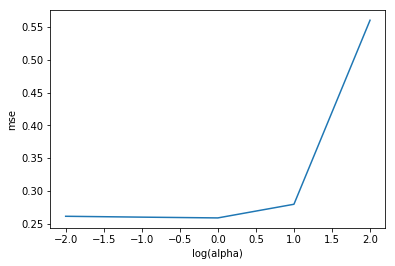

alpha is: 1.0


,coef,columns
6,[1.4674296469875943],temp
7,[1.2117581687057752],atemp
0,[0.7746201589519053],season
3,[0.1032099339970729],weekday
1,[0.04226565855009534],mnth
4,[0.01896110182089572],workingday
2,[-0.1886475370810854],holiday
8,[-0.33416570958867187],hum
9,[-0.6674520391857965],windspeed
5,[-0.7864018262867766],weathersit


In [38]:
mse_mean = np.mean(ridge.cv_values_, axis = 0)
plt.plot(np.log10(alphas), mse_mean.reshape(len(alphas),1)) 

#这是为了标出最佳参数的位置，不是必须
#plt.plot(np.log10(ridge.alpha_)*np.ones(3), [0.28, 0.29, 0.30])

plt.xlabel('log(alpha)')
plt.ylabel('mse')
plt.show()

print ('alpha is:', ridge.alpha_)

# 看看各特征的权重系数，系数的绝对值大小可视为该特征的重要性
fs = pd.DataFrame({"columns":list(columns), "coef":list((ridge.coef_.T))})
fs.sort_values(by=['coef'],ascending=False)

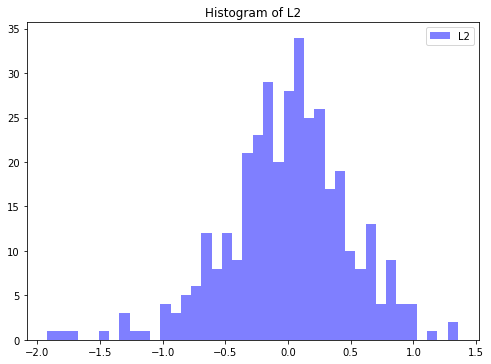

In [39]:
#在训练集上观察预测残差的分布，看是否符合模型假设：噪声为0均值的高斯噪声
f, ax = plt.subplots(figsize=(7, 5)) 
f.tight_layout() 
ax.hist(y_train - y_train_pred_ridge,bins=40, label='L2', color='b', alpha=.5); 
ax.set_title("Histogram of L2") 
ax.legend(loc='best');

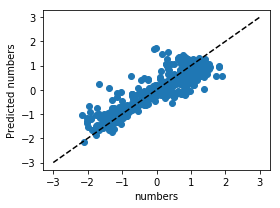

In [40]:
#还可以观察预测值与真值的散点图
plt.figure(figsize=(4, 3))
plt.scatter(y_train, y_train_pred_ridge)
plt.plot([-3, 3], [-3, 3], '--k')   #数据已经标准化，3倍标准差即可
plt.axis('tight')
plt.xlabel('numbers')
plt.ylabel('Predicted numbers')
plt.tight_layout()

In [41]:
#### Lasso／L1正则
# class sklearn.linear_model.LassoCV(eps=0.001, n_alphas=100, alphas=None, fit_intercept=True, 
#                                    normalize=False, precompute=’auto’, max_iter=1000, 
#                                    tol=0.0001, copy_X=True, cv=None, verbose=False, n_jobs=1,
#                                    positive=False, random_state=None, selection=’cyclic’)
from sklearn.linear_model import LassoCV

#设置超参数搜索范围
#alphas = [ 0.01, 0.1, 1, 10,100]

#生成一个LassoCV实例
#lasso = LassoCV(alphas=alphas)  
lasso = LassoCV()  

#训练（内含CV）
lasso.fit(X_train, y_train)  

#测试
y_test_pred_lasso = lasso.predict(X_test)
y_train_pred_lasso = lasso.predict(X_train)


# 评估，使用r2_score评价模型在测试集和训练集上的性能
print ('The r2 score of LassoCV on test is', r2_score(y_test, y_test_pred_lasso))
print ('The r2 score of LassoCV on train is', r2_score(y_train, y_train_pred_lasso))

The r2 score of LassoCV on test is -0.8058353876485549
The r2 score of LassoCV on train is 0.7291628010158908


D:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


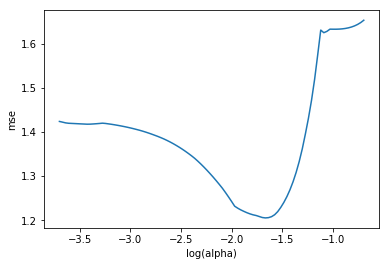

alpha is: 0.02148390894503786


,coef_lasso,coef_ridge,columns
6,2.326593,[1.4674296469875943],temp
7,0.000000,[1.2117581687057752],atemp
0,0.764436,[0.7746201589519053],season
3,0.000000,[0.1032099339970729],weekday
1,0.000000,[0.04226565855009534],mnth
4,0.000000,[0.01896110182089572],workingday
2,-0.000000,[-0.1886475370810854],holiday
8,-0.000000,[-0.33416570958867187],hum
9,-0.000000,[-0.6674520391857965],windspeed
5,-0.708286,[-0.7864018262867766],weathersit


In [45]:
mses = np.mean(lasso.mse_path_, axis = 1)
plt.plot(np.log10(lasso.alphas_), mses) 
#plt.plot(np.log10(lasso.alphas_)*np.ones(3), [0.3, 0.4, 1.0])
plt.xlabel('log(alpha)')
plt.ylabel('mse')
plt.show()    
            
print ('alpha is:', lasso.alpha_)

# 看看各特征的权重系数，系数的绝对值大小可视为该特征的重要性
fs = pd.DataFrame({"columns":list(columns),  "coef_ridge":list((ridge.coef_.T)), "coef_lasso":list((lasso.coef_.T))})
fs.sort_values(by=['coef_ridge'],ascending=False)

可以看出lasso模型有较多权重系数为0的项，拟合效果更好

Text(0.5,1,'Histogram of L1')

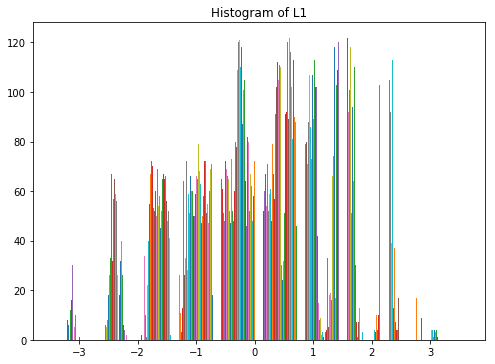

In [44]:
#在训练集上观察预测残差的分布，看是否符合模型假设：噪声为0均值的高斯噪声
f, ax = plt.subplots(figsize=(7, 5)) 
f.tight_layout() 
ax.hist(y_train - y_train_pred_lasso); 
ax.set_title("Histogram of L1") 
#ax.legend(loc='best');

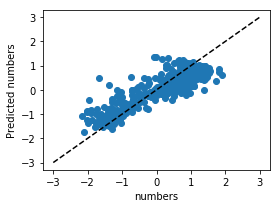

In [46]:
#还可以观察预测值与真值的散点图
plt.figure(figsize=(4, 3))
plt.scatter(y_train, y_train_pred_lasso)
plt.plot([-3, 3], [-3, 3], '--k')   #数据已经标准化，3倍标准差即可
plt.axis('tight')
plt.xlabel('numbers')
plt.ylabel('Predicted numbers')
plt.tight_layout()

整体来看lasso效果更好